In [728]:
clear all;

## Fonction de creation du noyau

## Definition des variables

### Definition des variables d'entre

In [729]:
clear all;
% points de données d'entrée
X = 0:0.01:0.99;
X = X';

### Definition de modele : 

On commence par un modele alearatoire

In [730]:
% definition de modele
y = cos(2*pi*X);

### Repartition des variables en entrainement et test

In [731]:

X_test = X(1:2:end);
y_test = y(1:2:end);
X_train = X(2:2:end);
y_train = y(2:2:end);
n = length(X); % nombre de points de données
n2 = length(X_train);
% size(y_train)

In [732]:
size(X)


ans =

   100     1



### Definition des parametres 

In [733]:
 % parametres initiaux
omega = ones(n2, 1);
size(omega)


ans =

    50     1



## Definition de noyau 

### Implementation de fonction de noyau

fichier noyau.m : 

In [734]:
% %%file noyau.m

% function noyau = noyau(x, x1, choix)
%   switch choix
%       case 1
%           % Noyau linéaire
%           c = 0.1; 
%           y = x' * x1 + c;
%       case 2
%           % Noyau polynomial
%           alpha = 0.05*10^-5; % Valeur arbitraire pour alpha, vous pouvez ajuster selon vos besoins
%           c = 1; % Valeur arbitraire pour c, vous pouvez ajuster selon vos besoins
%           d = 2; % Valeur arbitraire pour d, vous pouvez ajuster selon vos besoins
%           y = (alpha .* (x' .* x1) + c) .^ d;
%       case 3
%           % Noyau gaussien
%           sigma = 0.1; 
%           y = exp(-norm(x - x1) .^ 2 ./ (2 * sigma^2));
%       case 4
%           % Noyau exponentiel
%           sigma = 5; 
%           y = exp(-norm(x - x1) ./ (2 * sigma ^ 2));
%       case 5
%           % Noyau laplacien
%           sigma = 1; 
%           y = exp(-norm(x - x1) / sigma);
%       case 6
%           % Noyau sinc
%           sigma = 1; 
%           y = prod(sin(sigma * (x - x1)) ./ (sigma * (x - x1)));
%       otherwise
%           error('Type de noyau non reconnu.');
%   end
%   noyau = y;
% end

### Definition de noyau linéaire

In [735]:
% choix de noyau linéaire
choix = 2;
K = zeros(n2, n2);
for i = 1:n2 
  K(i, :) = noyau(X_train, X_train(i, :), choix);
end  
size(K)


ans =

    50    50



## Definition du fonction

La fonction est définie comme suivant : 

$f(\omega, x) = \sum_{i=1}^{n} \omega_i K(x, x_i)$


In [736]:
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);

## Definition de function de risque empirique

La fonction de risque empirique est définit comme suivante :

$ J (\omega, y) =  \frac{1}{n} \sum_{i = 0}^{n} \|f(\omega_i) - y_i\|^2  $ 


In [737]:
J = @(omega, y) 1/n * norm(f(omega) - y);

## Definition de gradient J

In [738]:
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);

## Gradient descent

In [739]:
alpha = 0.001;
num_iterations = 5000;
hist_omega = zeros(n2, num_iterations);
for i = 1:num_iterations
  omega =  omega - (alpha * gradJ(omega));
  hist_omega(:, i) = omega;
  err(i) = J(omega, y_train);
end

In [740]:
err(i)


ans =

    0.3541



In [741]:
norm(gradJ(omega))


ans =

   7.8288e-04



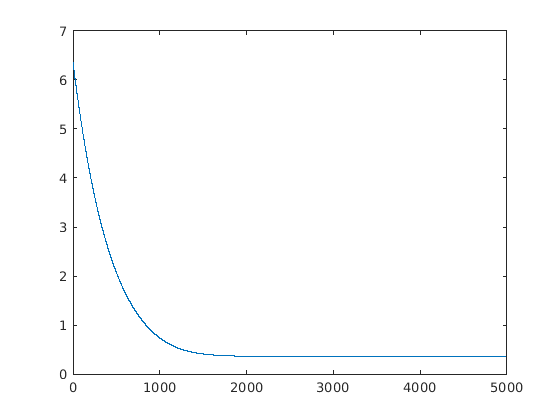

In [742]:
plot(1:num_iterations, err)

## Extraction des omega optimaux

In [743]:
min_err = find(err == min(err));
opt_omega = hist_omega(:, min_err);
J(opt_omega, X_train, y_train)

Error using @(omega,y)1/n*norm(f(omega)-y)
Too many input arguments.



## Affichage de resultats

On affiche les y_train avec les y que notre model a predit

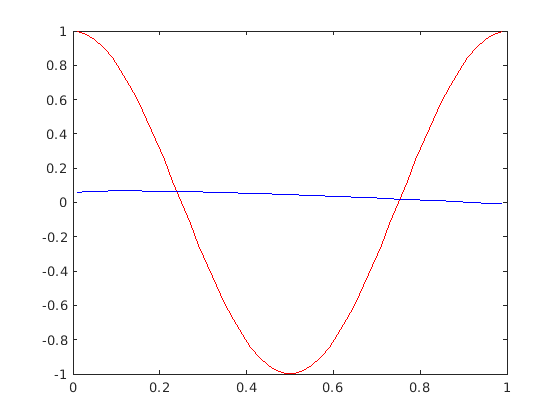

In [744]:
y_train_predit = f(opt_omega);
plot(X_train, y_train, 'r')
hold on
plot(X_train, y_train_predit, 'b')
hold off

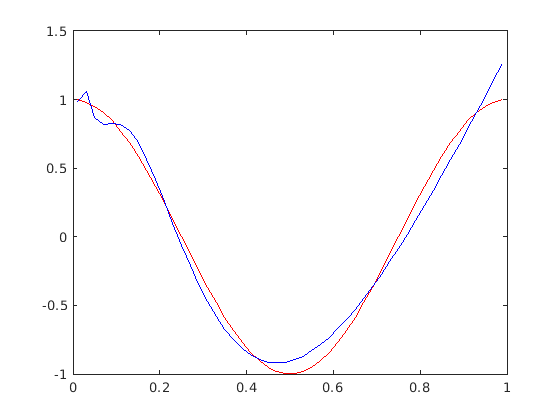

In [745]:
w_et = (K' * K) \ (K' * y_train);
y_opt = f(w_et);
plot(X_train, y_train, 'r')
hold on
plot(X_train, y_opt, 'b')
hold off

## Sur les donnees de test

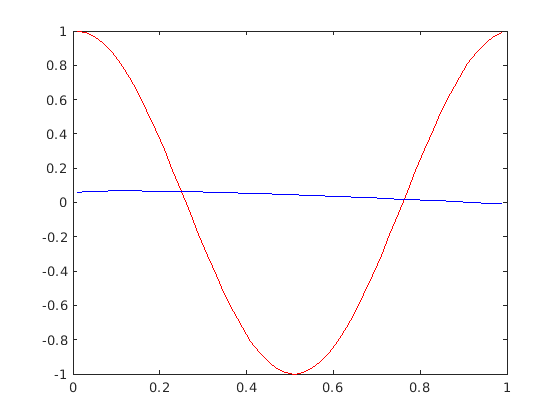

In [746]:
% y de test
y_test_predit = f(opt_omega);
plot(X_train, y_test, 'r')
hold on
plot(X_train, y_test_predit, 'b')
hold off

In [747]:
% y_train_predit = f(opt_omega, X_train );

norm(y_train_predit - y_train)


ans =

   35.4120



In [748]:
norm(y_test_predit - y_test)


ans =

   35.4120



In [749]:
w_et = (K' * K) \ (K' * y_train);
norm(opt_omega - w_et)
w_et;
opt_omega;



ans =

   4.8503e+07



## Utilisation des autres modèles

$
(1) \quad f^*(x) = |x|, \quad x \in [-1, 1] \\
(2) \quad f^*(x) = 3\|x\|^3 - 2\|x\|^2 + 3\|x\|^2 + 3, \quad x \in [-1, 1]^3 \\
(3) \quad f^*(x) = \sin(x_1 + x_2), \quad x \in [-2, 2]^2 \\
(4) \quad f^*(x) = \frac{1}{3}(x_1 + x_2)^3 - \frac{1}{4}(x_1 + x_2)
$

In [762]:
clear all;
X = -1:0.01:0.99;
X = X';
X_train = X(1:2:end);
X_test = X(2:2:end);
% size(X_train)
y_train = modele(1, X_train);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
  for i = 1:n2 
    K(i, :) = noyau(X_train, X_train(i, :), 2);
  end
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);

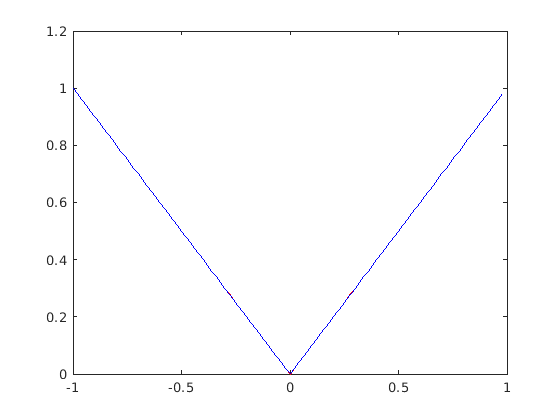

In [763]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train, y_train, 'r')
hold on
plot(X_train, y_et, 'b')
hold off

In [764]:
alpha = 0.1;
num_iterations = 1000;
err = zeros(1, num_iterations);
for i = 1:num_iterations
  omega =  omega - (alpha * gradJ(omega));
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
end

In [765]:
norm(gradJ(omega))


ans =

   4.1013e-04



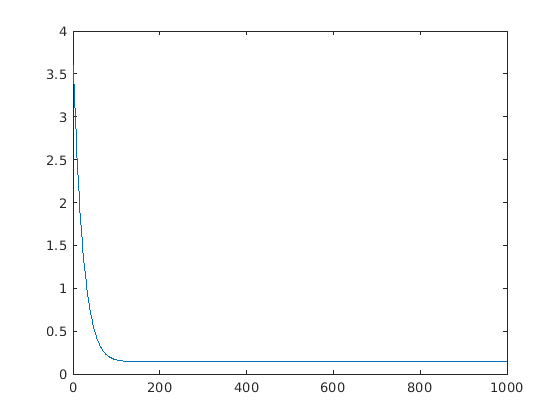

In [766]:
plot(1:num_iterations, err)


ans =

    0.1473



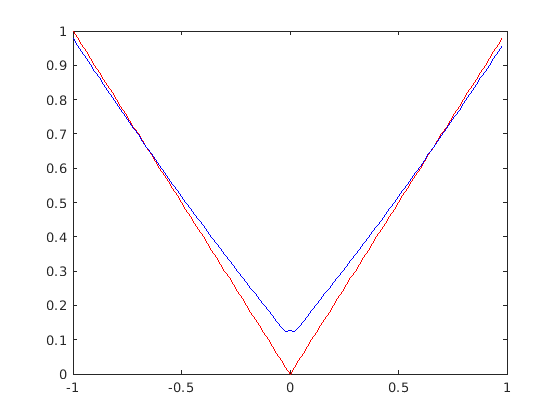

In [767]:
min_err = 0;
opt_omega = zeros(n2, 1);
min_err = find(err == min(err));
opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'r')
hold on
plot(X_train, y_predit, 'b')
hold off
